In [6]:
!pip install tensorflow
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_U

In [1]:
!which python

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/home/skwasny/bin/python


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
import shutil
import pandas as pd
from PIL import Image
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2025-06-06 01:53:22.266933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749167602.362174     852 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749167602.390107     852 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749167602.589619     852 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749167602.589670     852 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749167602.589671     852 computation_placer.cc:177] computation placer alr

In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
path = '/mnt/d/datasets/traffic-signs'
train_path = os.path.join(path, "Train")
train_aug_path = os.path.join(path, "Train_aug")
val_path = os.path.join(path, "val_temp")


In [5]:
data = []
labels = []
classes = 43

In [11]:
img_size = (64, 64)
batch_size = 64
seed = 42

In [6]:
img_size = (32, 32)
batch_size = 64
seed = 42

In [20]:
for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if os.path.isdir(class_dir):
        os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
        images = [f for f in os.listdir(class_dir) if f.endswith((".jpg", ".png"))]
        print(f"Katalog: {class_name} – liczba obrazów: {len(images)}")

        if len(images) == 0:
            print(f"Brak obrazów w {class_dir}")
            continue

        if images:
            val_split = int(len(images) * 0.2)
            val_images = np.random.choice(images, val_split, replace=False)
            for img in val_images:
                shutil.copy(os.path.join(class_dir, img), os.path.join(val_path, class_name, img))

Katalog: 0 – liczba obrazów: 210
Katalog: 1 – liczba obrazów: 2220
Katalog: 10 – liczba obrazów: 2010
Katalog: 11 – liczba obrazów: 1320
Katalog: 12 – liczba obrazów: 2100
Katalog: 13 – liczba obrazów: 2160
Katalog: 14 – liczba obrazów: 780
Katalog: 15 – liczba obrazów: 630
Katalog: 16 – liczba obrazów: 420
Katalog: 17 – liczba obrazów: 1110
Katalog: 18 – liczba obrazów: 1200
Katalog: 19 – liczba obrazów: 210
Katalog: 2 – liczba obrazów: 2250
Katalog: 20 – liczba obrazów: 360
Katalog: 21 – liczba obrazów: 330
Katalog: 22 – liczba obrazów: 390
Katalog: 23 – liczba obrazów: 510
Katalog: 24 – liczba obrazów: 270
Katalog: 25 – liczba obrazów: 1500
Katalog: 26 – liczba obrazów: 600
Katalog: 27 – liczba obrazów: 240
Katalog: 28 – liczba obrazów: 540
Katalog: 29 – liczba obrazów: 270
Katalog: 3 – liczba obrazów: 1410
Katalog: 30 – liczba obrazów: 450
Katalog: 31 – liczba obrazów: 780
Katalog: 32 – liczba obrazów: 240
Katalog: 33 – liczba obrazów: 689
Katalog: 34 – liczba obrazów: 420
Katalog:

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_aug_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

Found 96750 images belonging to 43 classes.
Found 19158 images belonging to 43 classes.


In [23]:
model = Sequential()
model.add(Input(shape=(64, 64, 3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

I0000 00:00:1749075383.998045    3455 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4080 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


In [8]:
# test dla 32x32
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

I0000 00:00:1749167734.322941     852 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4080 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

anc = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15
)

C:\Users\szcze\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 715s 472ms/step - accuracy: 0.2608 - loss: 2.6372 - val_accuracy: 0.9749 - val_loss: 0.1119
Epoch 2/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 363s 240ms/step - accuracy: 0.7941 - loss: 0.6537 - val_accuracy: 0.9918 - val_loss: 0.0382
Epoch 3/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 379s 250ms/step - accuracy: 0.8787 - loss: 0.3772 - val_accuracy: 0.9968 - val_loss: 0.0189
Epoch 4/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 362s 240ms/step - accuracy: 0.9128 - loss: 0.2711 - val_accuracy: 0.9976 - val_loss: 0.0092
Epoch 5/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 360s 238ms/step - accuracy: 0.9328 - loss: 0.2115 - val_accuracy: 0.9987 - val_loss: 0.0057
Epoch 6/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 361s 239ms/step - accuracy: 0.9398 - loss: 0.1842 - val_accuracy: 0.9978 - val_loss: 0.0082
Epoch 7/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 360s 238ms/step - accuracy: 0.9491 - loss: 0.1611 - val_accuracy: 0.9990 - val_loss: 0.0046
Epoch 8/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 362s 239ms/step - ac

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath='best_model2.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

In [25]:
anc = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, checkpoint]
)

/home/skwasny/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1749075463.265086    4929 service.cc:152] XLA service 0x7f5b900035b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749075463.265149    4929 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2025-06-05 00:17:43.317460: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749075463.666842    4929 cuda_dnn.cc:529] Loaded cuDNN version 91001
2025-06-05 00:17:44.475537: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.12 = (f32[64,32,60,60]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,64,64]{3,2,1,0} %bitcast.9851, f32[32,3,5,5]{3,2,1,0} %bitcast.9858, f32[32]{0} %bitcast.10421), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$co

   2/1512 ━━━━━━━━━━━━━━━━━━━━ 1:48 72ms/step - accuracy: 0.0273 - loss: 3.7949  

I0000 00:00:1749075475.879549    4929 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 839/1512 ━━━━━━━━━━━━━━━━━━━━ 8:34 764ms/step - accuracy: 0.2107 - loss: 2.8395

2025-06-05 00:28:38.523854: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.12 = (f32[46,32,60,60]{3,2,1,0}, u8[0]{0}) custom-call(f32[46,3,64,64]{3,2,1,0} %bitcast.9851, f32[32,3,5,5]{3,2,1,0} %bitcast.9858, f32[32]{0} %bitcast.10421), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/skwasny/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-05 00:28:38.673707: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorit

1512/1512 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.3132 - loss: 2.4181

2025-06-05 00:36:50.657803: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.12 = (f32[64,32,60,60]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,64,64]{3,2,1,0} %bitcast.556, f32[32,3,5,5]{3,2,1,0} %bitcast.563, f32[32]{0} %bitcast.565), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/skwasny/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-05 00:36:50.922426: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm e


Epoch 1: val_accuracy improved from -inf to 0.97223, saving model to best_model.keras
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1343s 878ms/step - accuracy: 0.3133 - loss: 2.4176 - val_accuracy: 0.9722 - val_loss: 0.1230
Epoch 2/50
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.7713 - loss: 0.7219
Epoch 2: val_accuracy improved from 0.97223 to 0.98836, saving model to best_model.keras
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 667s 441ms/step - accuracy: 0.7713 - loss: 0.7219 - val_accuracy: 0.9884 - val_loss: 0.0505
Epoch 3/50
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.8625 - loss: 0.4299
Epoch 3: val_accuracy improved from 0.98836 to 0.99452, saving model to best_model.keras
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 318s 211ms/step - accuracy: 0.8626 - loss: 0.4299 - val_accuracy: 0.9945 - val_loss: 0.0333
Epoch 4/50
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8954 - loss: 0.3270
Epoch 4: val_accuracy improved from 0.99452 to 0.99635, saving model to best_model.keras
1512/1

In [11]:
# test dla 32x32
anc = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, checkpoint]
)

/home/skwasny/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1749167789.176025    2173 service.cc:152] XLA service 0x7fbb3c0105c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749167789.176073    2173 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2025-06-06 01:56:29.282310: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749167789.886167    2173 cuda_dnn.cc:529] Loaded cuDNN version 91001
2025-06-06 01:56:30.857875: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.12 = (f32[64,32,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,32,32]{3,2,1,0} %bitcast.9851, f32[32,3,5,5]{3,2,1,0} %bitcast.9858, f32[32]{0} %bitcast.10421), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$co

   1/1512 ━━━━━━━━━━━━━━━━━━━━ 4:12:10 10s/step - accuracy: 0.0156 - loss: 3.7785

I0000 00:00:1749167796.424720    2173 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1020/1512 ━━━━━━━━━━━━━━━━━━━━ 5:26 663ms/step - accuracy: 0.1950 - loss: 2.8913

2025-06-06 02:07:53.399040: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.12 = (f32[46,32,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[46,3,32,32]{3,2,1,0} %bitcast.9851, f32[32,3,5,5]{3,2,1,0} %bitcast.9858, f32[32]{0} %bitcast.10421), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/skwasny/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-06 02:07:53.469596: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorit

1512/1512 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.2692 - loss: 2.5851

2025-06-06 02:13:18.069428: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.12 = (f32[64,32,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,32,32]{3,2,1,0} %bitcast.556, f32[32,3,5,5]{3,2,1,0} %bitcast.563, f32[32]{0} %bitcast.565), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/skwasny/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-06 02:13:18.215830: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm e


Epoch 1: val_accuracy improved from -inf to 0.94530, saving model to best_model2.keras
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1203s 789ms/step - accuracy: 0.2693 - loss: 2.5845 - val_accuracy: 0.9453 - val_loss: 0.2156
Epoch 2/50
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.7725 - loss: 0.7090
Epoch 2: val_accuracy improved from 0.94530 to 0.98241, saving model to best_model2.keras
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1104s 730ms/step - accuracy: 0.7725 - loss: 0.7089 - val_accuracy: 0.9824 - val_loss: 0.0656
Epoch 3/50
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.8706 - loss: 0.4128
Epoch 3: val_accuracy improved from 0.98241 to 0.98408, saving model to best_model2.keras
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1119s 740ms/step - accuracy: 0.8706 - loss: 0.4127 - val_accuracy: 0.9841 - val_loss: 0.0537
Epoch 4/50
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.9063 - loss: 0.2995
Epoch 4: val_accuracy improved from 0.98408 to 0.99029, saving model to best_model2.keras


In [25]:
model.save("my_model.keras")

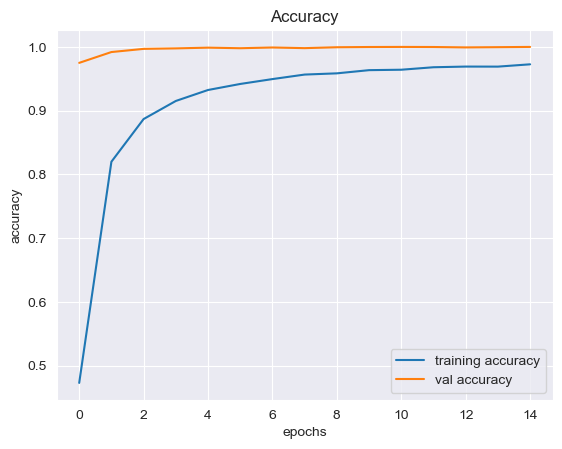

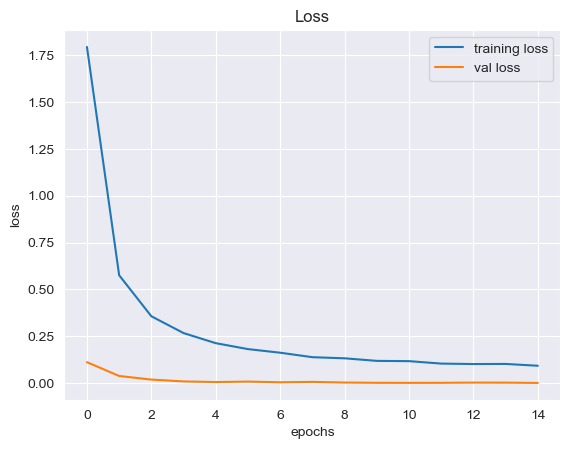

In [8]:
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

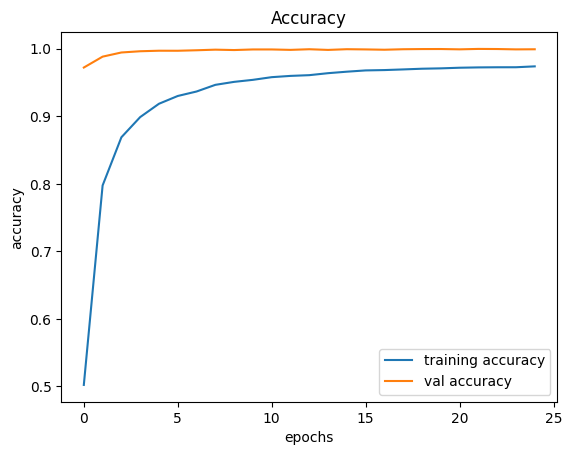

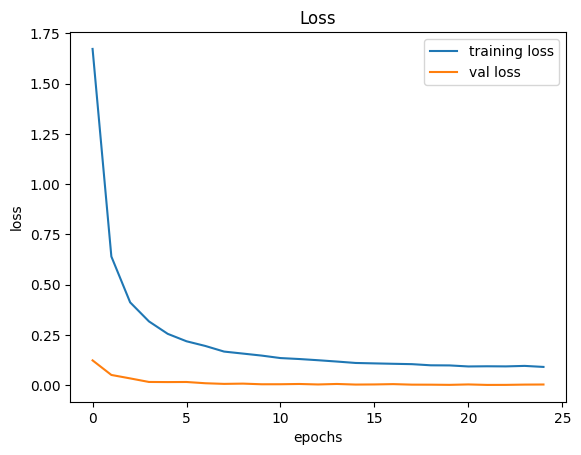

In [26]:
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

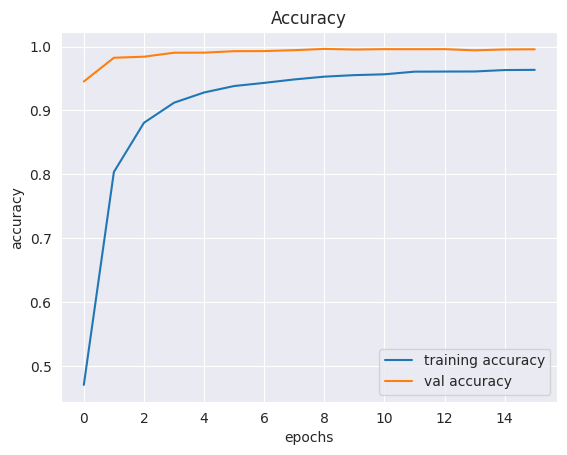

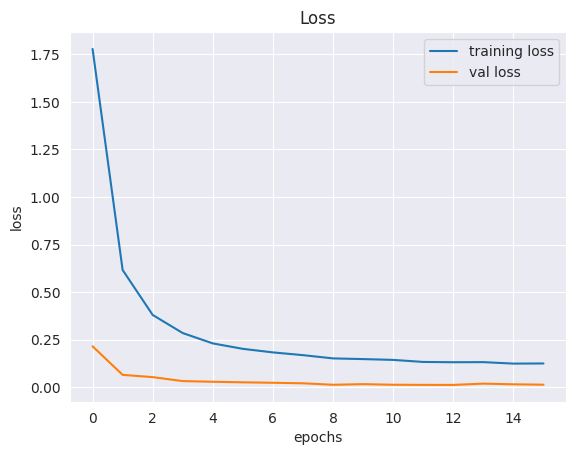

In [18]:
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl (40.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


In [33]:
y_test = pd.read_csv('/mnt/d/datasets/traffic-signs/Test2.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(os.path.join("/mnt/d/datasets/traffic-signs", img))
   image = image.resize(img_size)
   data.append(np.array(image))
X_test = np.array(data).astype('float32')/ 255.0
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

TypeError: 'int' object is not iterable

In [30]:
print("X_test shape:", X_test.shape)
print("Labels length:", len(labels))

X_test shape: (12630, 64, 64, 3)
Labels length: 12630


In [29]:
print(X_test.dtype, X_test.min(), X_test.max())

float64 0.0 1.0


In [21]:
from tensorflow.keras.models import load_model
# model = load_model("my_model.keras")

img_size = 64

y_test = pd.read_csv('/mnt/d/datasets/traffic-signs/Test2.csv')
labels = np.array(y_test["ClassId"])
imgs = y_test["Path"].values

data = []
for img in imgs:
    image = Image.open(os.path.join("/mnt/d/datasets/traffic-signs", img))
    image = image.resize((32, 32))  # Zmiana rozmiaru na 32x32
    data.append(np.array(image))

X_test = np.array(data).astype('float32') / 255.0

In [22]:
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

# Ocena
print("Test accuracy:", accuracy_score(labels, pred))
print(classification_report(labels, pred))

2025-06-06 09:48:02.858517: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.12 = (f32[32,32,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0} %bitcast.241, f32[32,3,5,5]{3,2,1,0} %bitcast.248, f32[32]{0} %bitcast.250), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/skwasny/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-06 09:48:02.948438: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm e

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Test accuracy: 0.9774346793349169
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.99      0.99      0.99       720
           2       1.00      0.99      1.00       660
           3       1.00      1.00      1.00       420
           4       0.99      0.95      0.97       690
           5       1.00      0.99      1.00       720
           6       1.00      1.00      1.00       270
           7       0.98      0.99      0.98       210
           8       1.00      1.00      1.00       150
           9       1.00      0.92      0.96       360
          10       0.98      0.88      0.93       390
          11       0.90      1.00      0.94        60
          12       1.00      0.99      0.99       750
          13       0.80      1.00      0.89        90
          14       0.79      0.86      0.82        90
          15       0.96      0.97      0.96       120
      

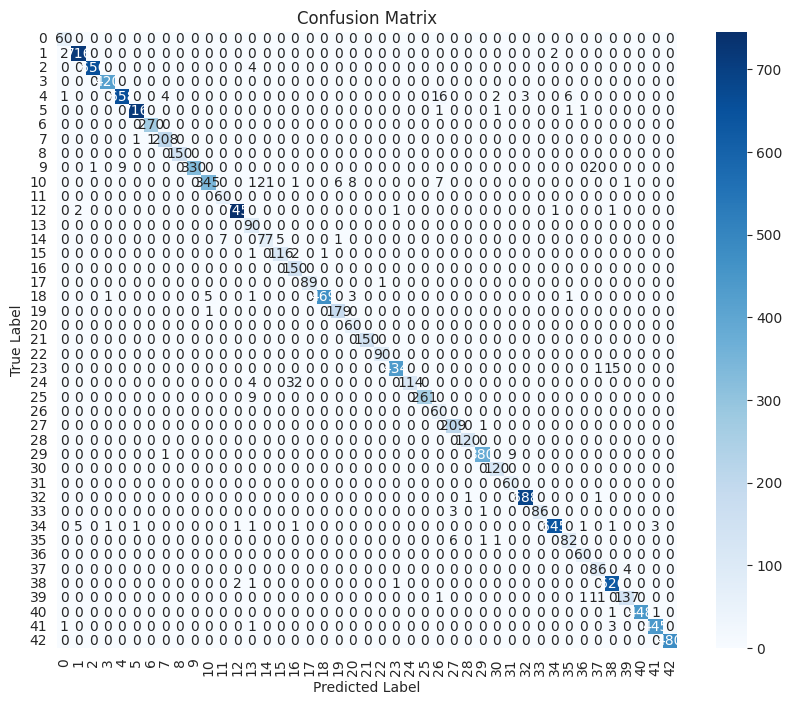

In [23]:
cm = confusion_matrix(labels, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(43), yticklabels=np.arange(43))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

# Ocena
print("Test accuracy:", accuracy_score(labels, pred))
print(classification_report(labels, pred))

2025-06-06 09:44:46.201715: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 620789760 exceeds 10% of free system memory.
2025-06-06 09:44:47.303680: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 620789760 exceeds 10% of free system memory.


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1024, but received input with shape (32, 9216)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 64, 64, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [21]:
simple_model = Sequential()
simple_model.add(Input(shape=(64, 64, 3)))
simple_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
simple_model.add(MaxPool2D(pool_size=(2, 2)))
simple_model.add(Flatten())
simple_model.add(Dense(64, activation='relu'))
simple_model.add(Dense(43, activation='softmax'))

simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

simple_anc = simple_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

C:\Users\szcze\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1340s 885ms/step - accuracy: 0.2912 - loss: 2.5913 - val_accuracy: 0.7771 - val_loss: 0.7938
Epoch 2/10
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 529s 350ms/step - accuracy: 0.6068 - loss: 1.3418 - val_accuracy: 0.8753 - val_loss: 0.4801
Epoch 3/10
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 205s 113ms/step - accuracy: 0.6710 - loss: 1.1054 - val_accuracy: 0.8927 - val_loss: 0.4041
Epoch 4/10
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 136s 90ms/step - accuracy: 0.7147 - loss: 0.9636 - val_accuracy: 0.9196 - val_loss: 0.3312
Epoch 5/10
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 149s 99ms/step - accuracy: 0.7458 - loss: 0.8567 - val_accuracy: 0.9199 - val_loss: 0.3152
Epoch 6/10
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 176s 116ms/step - accuracy: 0.7662 - loss: 0.7791 - val_accuracy: 0.9297 - val_loss: 0.2599
Epoch 7/10
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 162s 107ms/step - accuracy: 0.7885 - loss: 0.7016 - val_accuracy: 0.9401 - val_loss: 0.2357
Epoch 8/10
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 154s 102ms/step - acc

In [22]:
simple_model.save("simple_model.keras")

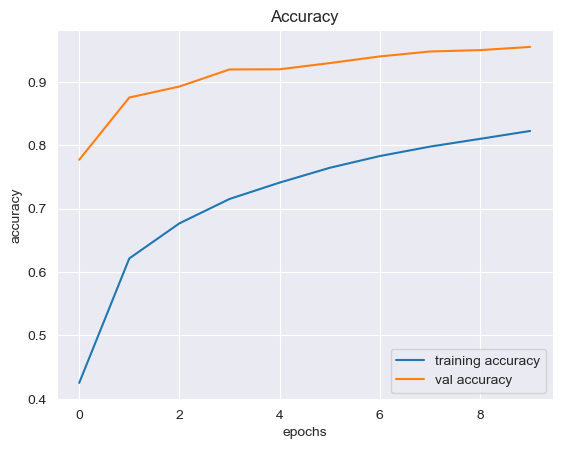

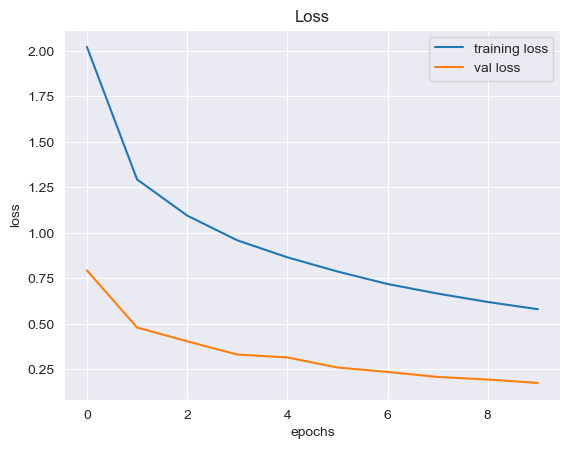

In [24]:
plt.figure(0)
plt.plot(simple_anc.history['accuracy'], label='training accuracy')
plt.plot(simple_anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(simple_anc.history['loss'], label='training loss')
plt.plot(simple_anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
simple_model = load_model("simple_model.keras")

In [15]:
pred_probs = simple_model.predict(X_test)
pred_simple = np.argmax(pred_probs, axis=1)

# Ocena
print("Test accuracy for simple model:", accuracy_score(labels, pred_simple))
print(classification_report(labels, pred_simple))

2025-06-06 09:35:30.756557: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 620789760 exceeds 10% of free system memory.
2025-06-06 09:35:31.888593: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 620789760 exceeds 10% of free system memory.


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Test accuracy for simple model: 0.7488519398258116
              precision    recall  f1-score   support

           0       0.44      0.30      0.36        60
           1       0.74      0.78      0.76       720
           2       0.85      0.96      0.90       660
           3       0.72      0.74      0.73       420
           4       1.00      0.88      0.93       690
           5       0.95      0.98      0.97       720
           6       0.99      0.85      0.91       270
           7       0.83      0.94      0.88       210
           8       0.64      0.93      0.76       150
           9       0.93      0.81      0.86       360
          10       0.68      0.80      0.73       390
          11       0.56      0.58      0.57        60
          12       0.68      0.84      0.75       750
          13       0.43      0.47      0.45        90
          14       0.56      0.61      0.58        90
          15       0.76      0.47      0.58

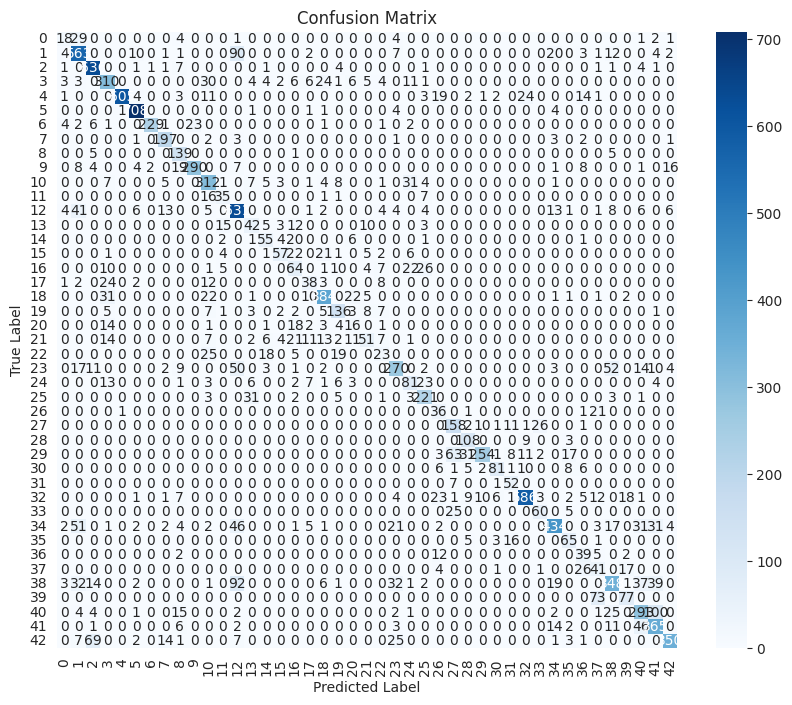

In [17]:
cm = confusion_matrix(labels, pred_simple)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(43), yticklabels=np.arange(43))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
simple_sigmoid_model = Sequential()
simple_sigmoid_model.add(Input(shape=(64, 64, 3)))
simple_sigmoid_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='sigmoid'))
simple_sigmoid_model.add(MaxPool2D(pool_size=(2, 2)))
simple_sigmoid_model.add(Flatten())
simple_sigmoid_model.add(Dense(64, activation='relu'))
simple_sigmoid_model.add(Dense(43, activation='softmax'))

simple_sigmoid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

simple_sigmoid_anc = simple_sigmoid_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

C:\Users\szcze\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1005s 664ms/step - accuracy: 0.0224 - loss: 3.8108 - val_accuracy: 0.0109 - val_loss: 3.7611
Epoch 2/10
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 632s 418ms/step - accuracy: 0.0234 - loss: 3.7614 - val_accuracy: 0.0280 - val_loss: 3.7641
Epoch 3/10
 608/1512 ━━━━━━━━━━━━━━━━━━━━ 1:56 129ms/step - accuracy: 0.0232 - loss: 3.7613

KeyboardInterrupt: 

In [ ]:
simple_sigmoid_model.save("simple_sigmoid_model.keras")

In [ ]:
plt.figure(0)
plt.plot(simple_sigmoid_anc.history['accuracy'], label='training accuracy')
plt.plot(simple_sigmoid_anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(simple_sigmoid_anc.history['loss'], label='training loss')
plt.plot(simple_sigmoid_anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False

vgg16_model = Sequential()
vgg16_model.add(base_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(256, activation='relu'))
vgg16_model.add(Dropout(rate=0.5))
vgg16_model.add(Dense(43, activation='softmax'))

vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

vgg16_anc = vgg16_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15
)

Epoch 1/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1156s 762ms/step - accuracy: 0.2250 - loss: 2.8635 - val_accuracy: 0.5909 - val_loss: 1.5315
Epoch 2/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1085s 718ms/step - accuracy: 0.5001 - loss: 1.6802 - val_accuracy: 0.6779 - val_loss: 1.1979
Epoch 3/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1104s 730ms/step - accuracy: 0.5931 - loss: 1.3621 - val_accuracy: 0.7305 - val_loss: 1.0078
Epoch 4/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1140s 754ms/step - accuracy: 0.6483 - loss: 1.1793 - val_accuracy: 0.7675 - val_loss: 0.8751
Epoch 5/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1143s 756ms/step - accuracy: 0.6875 - loss: 1.0463 - val_accuracy: 0.7897 - val_loss: 0.7881
Epoch 6/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1148s 759ms/step - accuracy: 0.7142 - loss: 0.9539 - val_accuracy: 0.8100 - val_loss: 0.7174
Epoch 7/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1141s 755ms/step - accuracy: 0.7385 - loss: 0.8783 - val_accuracy: 0.8293 - val_loss: 0.6461
Epoch 8/15
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 1140s 754ms/s

In [11]:
vgg16_model.save("vgg16_model.keras")

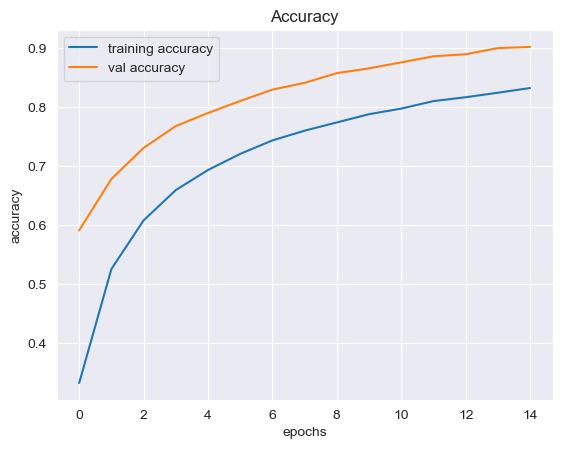

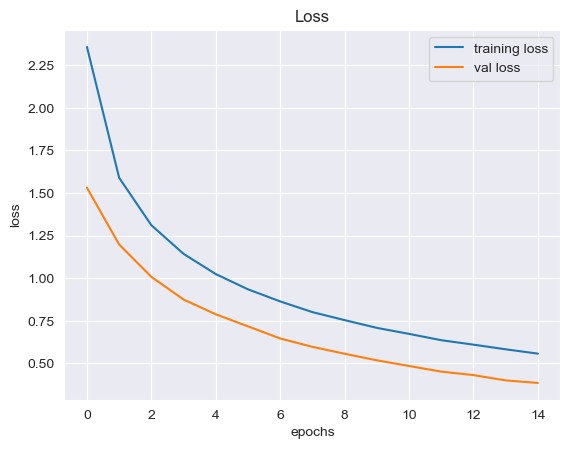

In [14]:
plt.figure(0)
plt.plot(vgg16_anc.history['accuracy'], label='training accuracy')
plt.plot(vgg16_anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(vgg16_anc.history['loss'], label='training loss')
plt.plot(vgg16_anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
pred_probs = vgg16_model.predict(X_test)
pred_vgg16 = np.argmax(pred_probs, axis=1)

# Ocena
print("Test accuracy:", accuracy_score(labels, pred_vgg16))
print(classification_report(labels, pred_vgg16))

395/395 ━━━━━━━━━━━━━━━━━━━━ 151s 381ms/step
Test accuracy: 0.6347585114806017
              precision    recall  f1-score   support

           0       0.19      0.48      0.27        60
           1       0.74      0.58      0.65       720
           2       0.66      0.84      0.74       660
           3       0.48      0.49      0.49       420
           4       1.00      0.89      0.94       690
           5       0.99      0.97      0.98       720
           6       0.89      0.91      0.90       270
           7       0.91      0.99      0.95       210
           8       0.90      0.79      0.84       150
           9       0.95      0.84      0.89       360
          10       0.75      0.55      0.64       390
          11       0.34      0.57      0.42        60
          12       0.59      0.35      0.44       750
          13       0.24      0.56      0.34        90
          14       0.41      0.77      0.53        90
          15       0.48      0.67      0.56       120
  

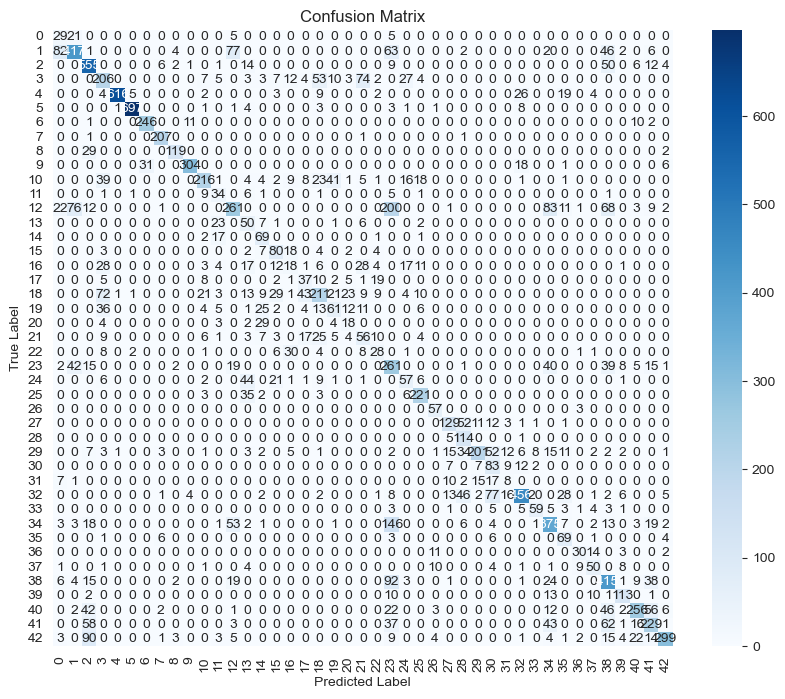

In [17]:
cm = confusion_matrix(labels, pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(43), yticklabels=np.arange(43))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
models = ['Simple Model', 'Optimized Model', 'VGG16 Model']
accuracies = [
    accuracy_score(labels, pred_simple),
    accuracy_score(labels, pred),
    accuracy_score(labels, pred_vgg16)
]

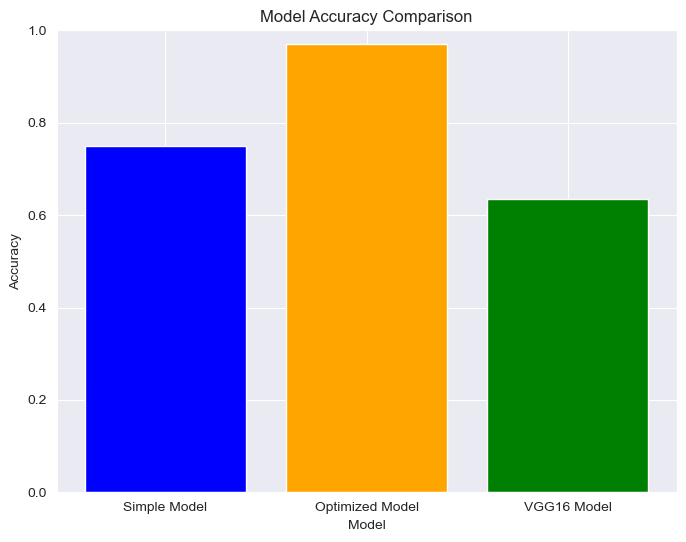

In [31]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()